In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [3]:
r = pd.read_csv('long_series_logret.csv',index_col=0)

r.index = pd.DatetimeIndex(r.index)

#Only data after 2000. Do you Remember the zero return problem? 
r = r[r.index.year>2000]

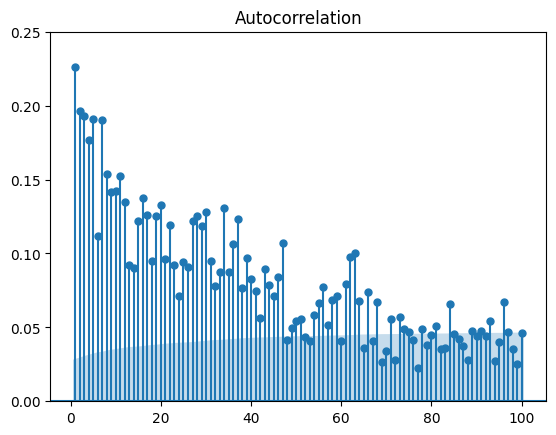

In [4]:
# The autocorrelation function of the volatility is long range.
sm.graphics.tsa.plot_acf( r**2 ,lags=100, zero=False)
plt.ylim([0,0.25])
plt.show()

In [5]:
# Note that the returns must be rescaled to avoid convergence error (floating points). 
# Yearly rescaling is the most natural one (252)

models = []
for i in range(1,25):
    ft = arch_model(252*r,vol='ARCH', p=i).fit()
    
    models.append(( i,ft.bic,ft.aic))


Iteration:      1,   Func. Count:      5,   Neg. LLF: 17914.663722878675
Iteration:      2,   Func. Count:     11,   Neg. LLF: 17154.10286581057
Iteration:      3,   Func. Count:     17,   Neg. LLF: 16666.71903922712
Iteration:      4,   Func. Count:     21,   Neg. LLF: 16666.70323683939
Iteration:      5,   Func. Count:     25,   Neg. LLF: 16666.70321152884
Iteration:      6,   Func. Count:     28,   Neg. LLF: 16666.70321152866
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16666.70321152884
            Iterations: 6
            Function evaluations: 28
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 22840.20684542571
Iteration:      2,   Func. Count:     13,   Neg. LLF: 16839.84834122635
Iteration:      3,   Func. Count:     20,   Neg. LLF: 16686.884055409235
Iteration:      4,   Func. Count:     27,   Neg. LLF: 16585.083081494275
Iteration:      5,   Func. Count:     34,   Neg. LLF: 16534.3705446135

In [6]:
models = pd.DataFrame(models,columns=['order','BIC','AIC']).set_index('order')

models = models.assign(dBIC=( models.BIC - models.BIC.min()),
              dAIC =( models.AIC - models.AIC.min()))

In [7]:
models

,BIC,AIC,dBIC,dAIC
order,,,,
1,33358.861053,33339.406423,577.903501,688.176196
2,33102.680586,33076.741079,321.723034,425.510852
3,33018.319159,32985.894776,237.361607,334.664549
4,32887.040449,32848.131189,106.082897,196.900962
5,32851.515355,32806.121219,70.557803,154.890991
6,32858.157642,32806.278630,77.200091,155.048402
7,32808.028182,32749.664292,27.070630,98.434065
8,32780.957552,32716.108786,0.000000,64.878559
9,32785.788604,32714.454961,4.831052,63.224734


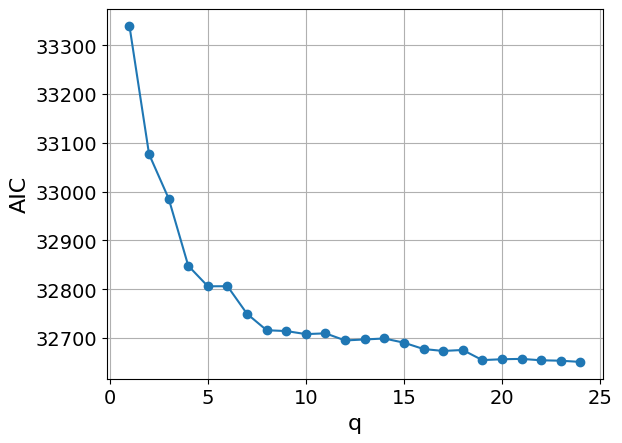

In [8]:
plt.plot(models.AIC,'-o')
plt.xlabel('q',fontsize=16)
plt.ylabel('AIC',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()

In [9]:
# The AIC is monotonically decreasing


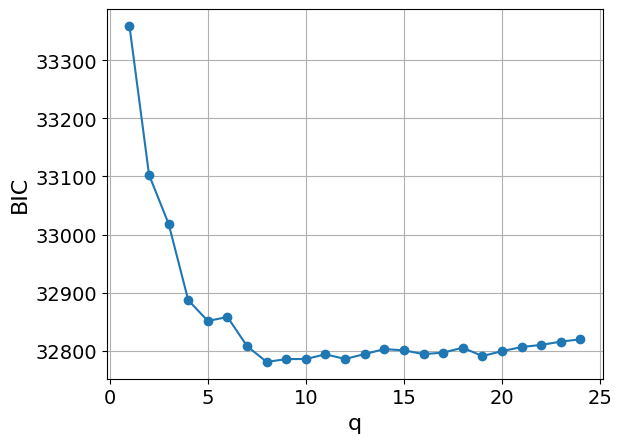

In [10]:
# The BIC not!
plt.plot(models.BIC,'-o')
plt.xlabel('q',fontsize=16)
plt.ylabel('BIC',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()

In [11]:
models

,BIC,AIC,dBIC,dAIC
order,,,,
1,33358.861053,33339.406423,577.903501,688.176196
2,33102.680586,33076.741079,321.723034,425.510852
3,33018.319159,32985.894776,237.361607,334.664549
4,32887.040449,32848.131189,106.082897,196.900962
5,32851.515355,32806.121219,70.557803,154.890991
6,32858.157642,32806.278630,77.200091,155.048402
7,32808.028182,32749.664292,27.070630,98.434065
8,32780.957552,32716.108786,0.000000,64.878559
9,32785.788604,32714.454961,4.831052,63.224734


In [12]:
# The BIC has a minimum q=8

In [13]:
ft = arch_model(252*r,vol='ARCH', p=8).fit()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 23911.621235945728
Iteration:      2,   Func. Count:     25,   Neg. LLF: 17036.98340006081
Iteration:      3,   Func. Count:     38,   Neg. LLF: 16880.82491243435
Iteration:      4,   Func. Count:     51,   Neg. LLF: 16705.533829457472
Iteration:      5,   Func. Count:     63,   Neg. LLF: 17250.01933237972
Iteration:      6,   Func. Count:     76,   Neg. LLF: 30089.64928724274
Iteration:      7,   Func. Count:     89,   Neg. LLF: 17322.11369681498
Iteration:      8,   Func. Count:    102,   Neg. LLF: 17113.205539564293
Iteration:      9,   Func. Count:    115,   Neg. LLF: 16676.105247169173
Iteration:     10,   Func. Count:    127,   Neg. LLF: 17383.303455221652
Iteration:     11,   Func. Count:    140,   Neg. LLF: 16409.086493997074
Iteration:     12,   Func. Count:    152,   Neg. LLF: 16406.037824960724
Iteration:     13,   Func. Count:    164,   Neg. LLF: 16350.28803864686
Iteration:     14,   Func. Count:    176,   Neg. LLF: 163

In [14]:
ft

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                    NAV   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -16348.1
Distribution:                  Normal   AIC:                           32716.1
Method:            Maximum Likelihood   BIC:                           32781.0
                                        No. Observations:                 4841
Date:                Mon, Sep 16 2024   Df Residuals:                     4840
Time:                        16:56:38   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1806      0.104      1.734  8.283e-02 [-2.34

In [15]:
# Most of them are significant, but they are a lot! We can copmare the best BIC of ARCH 
# with the best BIC from a GARCH(p,q)

In [16]:
best_bic_arch = ft.bic

In [17]:
parms = [(i,j) for i in range(1,6) for j in range(1,6)]

In [18]:
models = []
for i,j in parms:
    ft = arch_model(252*r, vol='GARCH', p=i,q=j).fit()
    
    models.append(( (i,j),ft.bic,ft.aic))


Iteration:      1,   Func. Count:      6,   Neg. LLF: 32170.995979417272
Iteration:      2,   Func. Count:     14,   Neg. LLF: 48366.6286727902
Iteration:      3,   Func. Count:     22,   Neg. LLF: 26805.49445084363
Iteration:      4,   Func. Count:     30,   Neg. LLF: 18470.106865172987
Iteration:      5,   Func. Count:     36,   Neg. LLF: 16334.771580367971
Iteration:      6,   Func. Count:     41,   Neg. LLF: 16334.7673660612
Iteration:      7,   Func. Count:     46,   Neg. LLF: 16334.767326603565
Iteration:      8,   Func. Count:     51,   Neg. LLF: 16334.767325741685
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16334.767325741685
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      7,   Neg. LLF: 30869.91728878211
Iteration:      2,   Func. Count:     15,   Neg. LLF: 67525.27303931
Iteration:      3,   Func. Count:     24,   Neg. LLF: 17674.084819038675

In [19]:
models = pd.DataFrame(models,columns=['order','BIC','AIC']).set_index('order')

models = models.assign(dBIC=( models.BIC - models.BIC.min()),
              dAIC =( models.AIC - models.AIC.min()))

Text(0.5, 0, 'order')

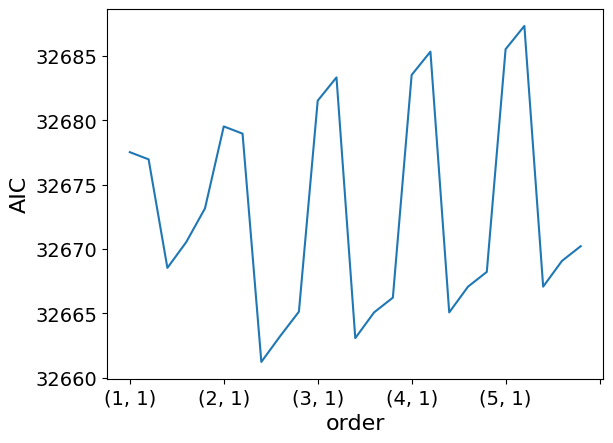

In [20]:
models.AIC.plot()
plt.tick_params(labelsize=14)
plt.ylabel('AIC',fontsize=16)
plt.xlabel('order',fontsize=16)

In [21]:
# The AIC seems to prefer very complex models; however, 
#looking at the patameters many of them are not significant

In [22]:
i,j = models.AIC.idxmin()
ft = arch_model(252*r, vol='GARCH', p=i,q=j).fit()
    

Iteration:      1,   Func. Count:      9,   Neg. LLF: 121187.2174277238
Iteration:      2,   Func. Count:     19,   Neg. LLF: 5420025.415604292
Iteration:      3,   Func. Count:     29,   Neg. LLF: 16556.41614413911
Iteration:      4,   Func. Count:     38,   Neg. LLF: 16884.323755558467
Iteration:      5,   Func. Count:     47,   Neg. LLF: 16499.520875203652
Iteration:      6,   Func. Count:     56,   Neg. LLF: 16355.137579592774
Iteration:      7,   Func. Count:     65,   Neg. LLF: 16690.440566110352
Iteration:      8,   Func. Count:     74,   Neg. LLF: 16404.86799500804
Iteration:      9,   Func. Count:     83,   Neg. LLF: 16464.325149757147
Iteration:     10,   Func. Count:     92,   Neg. LLF: 16348.619255065878
Iteration:     11,   Func. Count:    101,   Neg. LLF: 16330.628839853529
Iteration:     12,   Func. Count:    110,   Neg. LLF: 16323.68172883098
Iteration:     13,   Func. Count:    118,   Neg. LLF: 16323.703525458512
Iteration:     14,   Func. Count:    127,   Neg. LLF: 16

In [23]:
ft

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    NAV   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -16323.6
Distribution:                  Normal   AIC:                           32661.2
Method:            Maximum Likelihood   BIC:                           32706.6
                                        No. Observations:                 4841
Date:                Mon, Sep 16 2024   Df Residuals:                     4840
Time:                        16:56:40   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1744      0.105      1.661  9.679e-02 [-3.14

Text(0.5, 0, 'order')

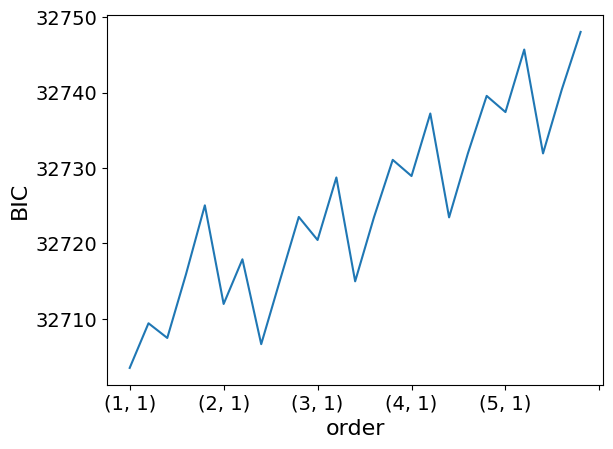

In [24]:
models.BIC.plot()
plt.tick_params(labelsize=14)
plt.ylabel('BIC',fontsize=16)
plt.xlabel('order',fontsize=16)

In [25]:
# The BIC identify the (1,1) as the best model (in agreement with our expectations)

In [26]:
i,j = models.BIC.idxmin()
ft = arch_model(252*r, vol='GARCH', p=i,q=j).fit()
    

Iteration:      1,   Func. Count:      6,   Neg. LLF: 32170.995979417272
Iteration:      2,   Func. Count:     14,   Neg. LLF: 48366.6286727902
Iteration:      3,   Func. Count:     22,   Neg. LLF: 26805.49445084363
Iteration:      4,   Func. Count:     30,   Neg. LLF: 18470.106865172987
Iteration:      5,   Func. Count:     36,   Neg. LLF: 16334.771580367971
Iteration:      6,   Func. Count:     41,   Neg. LLF: 16334.7673660612
Iteration:      7,   Func. Count:     46,   Neg. LLF: 16334.767326603565
Iteration:      8,   Func. Count:     51,   Neg. LLF: 16334.767325741685
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16334.767325741685
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8


In [27]:
ft

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    NAV   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -16334.8
Distribution:                  Normal   AIC:                           32677.5
Method:            Maximum Likelihood   BIC:                           32703.5
                                        No. Observations:                 4841
Date:                Mon, Sep 16 2024   Df Residuals:                     4840
Time:                        16:56:40   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1695  9.950e-02      1.704  8.845e-02 [-2.55

In [28]:
#All the parameter as significant

In [29]:
# The increment with respect to the best arch is huge
best_bic_arch - models.BIC.min()

77.48339381825645

In [30]:
# Let us try to use the t-distribution 

In [31]:
modelsT = []
for i,j in parms:
    ft = arch_model(252*r, vol='GARCH', p=i,q=j,dist='t').fit()
    
    modelsT.append(((i,j),ft.bic,ft.aic))


Iteration:      1,   Func. Count:      7,   Neg. LLF: 23598.563859428737
Iteration:      2,   Func. Count:     15,   Neg. LLF: 19135.46011670574
Iteration:      3,   Func. Count:     23,   Neg. LLF: 21645.877157718256
Iteration:      4,   Func. Count:     31,   Neg. LLF: 19970.34997521085
Iteration:      5,   Func. Count:     38,   Neg. LLF: 16139.173365526833
Iteration:      6,   Func. Count:     45,   Neg. LLF: 16305.916155650497
Iteration:      7,   Func. Count:     52,   Neg. LLF: 16107.245273967545
Iteration:      8,   Func. Count:     59,   Neg. LLF: 16114.099893431696
Iteration:      9,   Func. Count:     66,   Neg. LLF: 16101.233989357552
Iteration:     10,   Func. Count:     72,   Neg. LLF: 16101.230720154486
Iteration:     11,   Func. Count:     78,   Neg. LLF: 16101.23064582987
Iteration:     12,   Func. Count:     83,   Neg. LLF: 16101.230645829904
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16101.23064582987
            Iterati

In [32]:
modelsT = pd.DataFrame(modelsT,columns=['order','BIC','AIC']).set_index('order')

modelsT = modelsT.assign(dBIC=( modelsT.BIC - modelsT.BIC.min()),
              dAIC =( modelsT.AIC - modelsT.AIC.min()))

Text(0.5, 0, 'order')

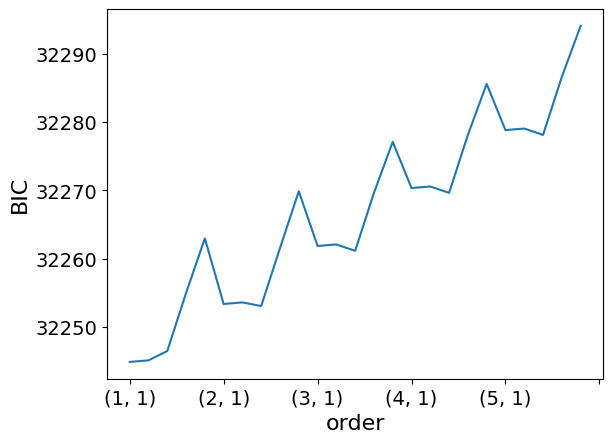

In [33]:
modelsT.BIC.plot()

plt.tick_params(labelsize=14)
plt.ylabel('BIC',fontsize=16)
plt.xlabel('order',fontsize=16)

In [34]:
#Including the t-distribution do not change the optimal order

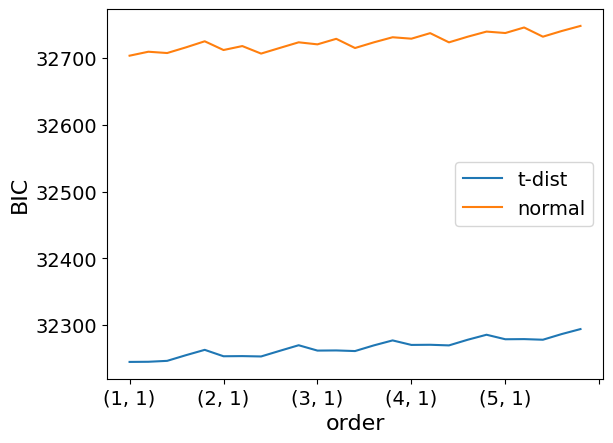

In [35]:
modelsT.BIC.plot(label='t-dist')
models.BIC.plot(label='normal')
plt.tick_params(labelsize=14)
plt.ylabel('BIC',fontsize=16)
plt.xlabel('order',fontsize=16)
plt.legend(loc='best',fontsize=14)

In [36]:
# The improvment of using the t-distribution is huge!

In [37]:
i,j = modelsT.BIC.idxmin()
ft = arch_model(252*r, vol='GARCH', p=i,q=j,dist='t').fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 23598.563859428737
Iteration:      2,   Func. Count:     15,   Neg. LLF: 19135.46011670574
Iteration:      3,   Func. Count:     23,   Neg. LLF: 21645.877157718256
Iteration:      4,   Func. Count:     31,   Neg. LLF: 19970.34997521085
Iteration:      5,   Func. Count:     38,   Neg. LLF: 16139.173365526833
Iteration:      6,   Func. Count:     45,   Neg. LLF: 16305.916155650497
Iteration:      7,   Func. Count:     52,   Neg. LLF: 16107.245273967545
Iteration:      8,   Func. Count:     59,   Neg. LLF: 16114.099893431696
Iteration:      9,   Func. Count:     66,   Neg. LLF: 16101.233989357552
Iteration:     10,   Func. Count:     72,   Neg. LLF: 16101.230720154486
Iteration:     11,   Func. Count:     78,   Neg. LLF: 16101.23064582987
Iteration:     12,   Func. Count:     83,   Neg. LLF: 16101.230645829904
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16101.23064582987
            Iterati

In [38]:
help(arch_model)

Help on function arch_model in module arch.univariate.mean:

arch_model(y: 'ArrayLike | None', x: 'ArrayLike2D | None' = None, mean: "Literal['Constant', 'Zero', 'LS', 'AR', 'ARX', 'HAR', 'HARX', 'constant', 'zero']" = 'Constant', lags: 'None | int | list[int] | Int32Array | Int64Array' = 0, vol: "Literal['GARCH', 'ARCH', 'EGARCH', 'FIGARCH', 'APARCH', 'HARCH', 'FIGARCH']" = 'GARCH', p: 'int | list[int]' = 1, o: 'int' = 0, q: 'int' = 1, power: 'float' = 2.0, dist: "Literal['normal', 'gaussian', 't', 'studentst', 'skewstudent', 'skewt', 'ged', 'generalized error']" = 'normal', hold_back: 'int | None' = None, rescale: 'bool | None' = None) -> 'HARX'
    Initialization of common ARCH model specifications
    
    Parameters
    ----------
    y : ndarray, Series, None
        The dependent variable
    x : ndarray, DataFrame, optional
        Exogenous regressors.  Ignored if model does not permit exogenous
        regressors.
    mean : str, optional
        Name of the mean model.  Curr

In [39]:
ft

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                          NAV   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -16101.2
Distribution:      Standardized Student's t   AIC:                           32212.5
Method:                  Maximum Likelihood   BIC:                           32244.9
                                              No. Observations:                 4841
Date:                      Mon, Sep 16 2024   Df Residuals:                     4840
Time:                              16:56:44   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

In [40]:
#All significant parameters, please note 
#that t-distribution estimation requires to estimate also the df of the t-dist

In [41]:
# The conditional volatility show the typical volatility pattern we should expect, 
# i.e. volatility clustering

Text(0, 0.5, 'conditional volatility')

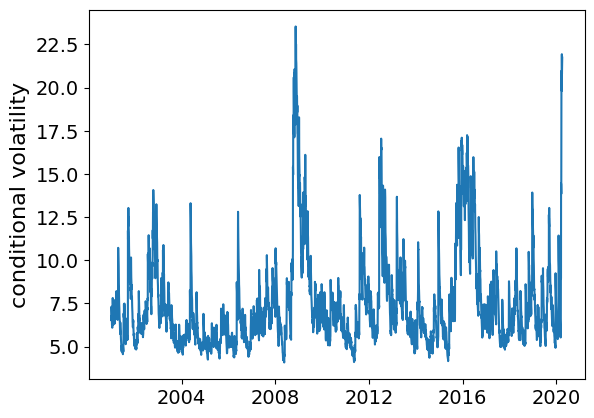

In [42]:
plt.plot(ft.conditional_volatility)
plt.tick_params(labelsize=14)
plt.ylabel('conditional volatility',fontsize=16)

In [43]:
# The residues have significant serial correlation

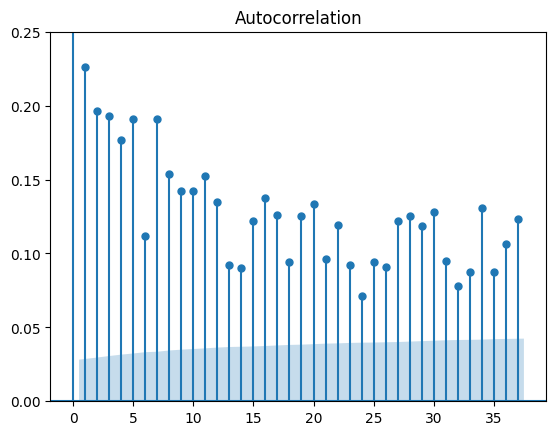

In [44]:
sm.graphics.tsa.plot_acf( ft.resid**2 )
plt.ylim([0,0.25])
plt.show()

In [45]:
# Clearly also the conditional variance has significant serial correlation 

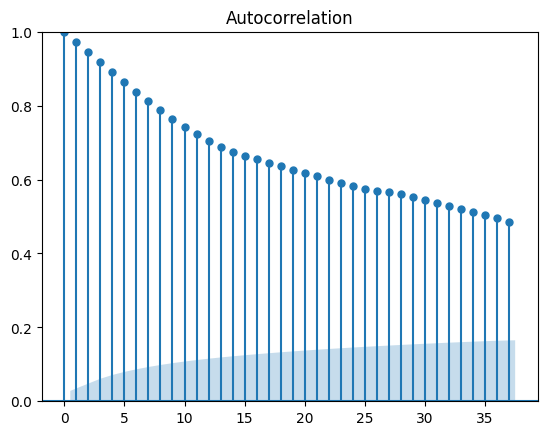

In [46]:
sm.graphics.tsa.plot_acf( ft.conditional_volatility**2 )
plt.ylim([0,1])
plt.show()

In [47]:
# Let us look at the devolatized returns

In [48]:
dev_ret = ft.resid/ ft.conditional_volatility 

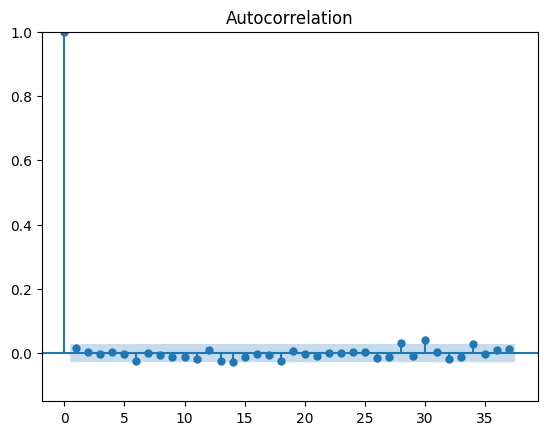

In [49]:
sm.graphics.tsa.plot_acf( dev_ret**2 )
plt.ylim([-0.15,1])
plt.show()

In [50]:
# They seems almost without a serial correlation

In [51]:
acorr_ljungbox(dev_ret**2,lags=10,return_df=True)

,lb_stat,lb_pvalue
1,1.098803,0.294529
2,1.202046,0.548250
3,1.226350,0.746692
4,1.273445,0.865865
5,1.333526,0.931444
6,4.116687,0.660889
7,4.117198,0.766184
8,4.276521,0.831353
9,5.113873,0.824271
10,5.946548,0.819734


In [52]:
# No significant correlation is observed